# Give Me Some Credit
Wojciech Kasperski - Politechnika Poznańska - Informatyka - Rok 3 - Sem 5

## Cylk pracy nad modelem:

### Eksploracja danych
- identyfikacja braków i nieprawidłowości w danych
- poszukiwanie potencjalnych korelacji między cechami, a funkcją celu

### Inżynieria cech (ang. feature engineering)
- czyszczenie danych odstających (ang. outliers)
- normalizacja
- łączenie zbioru danych ze źródłami zewnętrznymi (np. pogoda, dzień tygodnia)
- łączenie cech ze sobą (ang. feature crosses - np. szerokość i długość geograficzna)
- różnego rodzaju przeształcenia (bucketzacja - zmiana cechy ciągłej na kategoryczną)


### Stworzenie modelu
- Wybranie algorytmu
- Uczenie modelu
- Weryfikacja wyników
- Tuning hiperparametrów

Zakładam, że samo stworznie modelu to będzie zwieńczeniem pracy, przede wszystkim postaram się na początek skupić na eksploracji, zrozumieniu danych i ewentualnej inżynierii cech, gdy napotkam problemy w danych.

## Eksploracja i normalizacja danych

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
headers = ['title', 'predict_cat1', 'predict_cat1', 'predict_cat1']
train = pd.read_csv('GiveMeSomeCredit\cs-training.csv')
test = pd.read_csv('GiveMeSomeCredit\cs-test.csv')
data = pd.concat([train, test], ignore_index=1)

#### Wstępne przyjrzenie się danym:

In [3]:
data[0:20]

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1.0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0.0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0.0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0.0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0.0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,6,0.0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,7,0.0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,8,0.0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,9,0.0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,10,0.0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


In [4]:
data.shape # (Rekordy, kolumny)

(251503, 12)

In [5]:
data = data.drop('Unnamed: 0', axis=1) 

In [6]:
data.describe().T # Opis statystyczny danych

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,251503.0,5.750415,229.633980,0.0,0.029977,0.153575,0.561293,50708.0
age,251503.0,52.339694,14.775120,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,251503.0,0.434245,4.335643,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,251503.0,349.562468,1884.792016,0.0,0.174330,0.365612,0.861754,329664.0
MonthlyIncome,201669.0,6744.818167,25717.610237,0.0,3400.000000,5400.000000,8212.000000,7727000.0
NumberOfOpenCreditLinesAndLoans,251503.0,8.453064,5.145194,0.0,5.000000,8.000000,11.000000,85.0
NumberOfTimes90DaysLate,251503.0,0.278370,4.312539,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,251503.0,1.016155,1.121935,0.0,0.000000,1.000000,2.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,251503.0,0.252466,4.299204,0.0,0.000000,0.000000,0.000000,98.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251503 entries, 0 to 251502
Data columns (total 11 columns):
SeriousDlqin2yrs                        150000 non-null float64
RevolvingUtilizationOfUnsecuredLines    251503 non-null float64
age                                     251503 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    251503 non-null int64
DebtRatio                               251503 non-null float64
MonthlyIncome                           201669 non-null float64
NumberOfOpenCreditLinesAndLoans         251503 non-null int64
NumberOfTimes90DaysLate                 251503 non-null int64
NumberRealEstateLoansOrLines            251503 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    251503 non-null int64
NumberOfDependents                      244953 non-null float64
dtypes: float64(5), int64(6)
memory usage: 21.1 MB


Opis danych (PL):
- **SeriousDlqin2yrs** - popadnięcie w zadłużenie w ciągu dwóch lat
- **RevolvingUtilizationOfUnsecuredLines** - Obrotowe wykorzystanie niezabezpieczonych linii kredytowych/pożyczkowych
- **age** - wiek
- **NumberOfTime30-59DaysPastDueNotWorse** - Dni po zapłaty terminie nie były większe niż 30-59 dni
- **DebtRatio** - wpółczynnik zadłużenia
- **MonthlyIncome** - miesięczny przychód
- **NumberOfOpenCreditLinesAndLoans** - ilość otwartych linii kredytowych i pożyczek
- **NumberOfTimes90DaysLate** - Ilość opóźnień ze spłatą powyżej 90 dni
- **NumberRealEstateLoansOrLines** - Liczba pożyczek lub kredytów na nieruchomości
- **NumberOfTime60-89DaysPastDueNotWorse** - Dni po zapłaty terminie nie były większe niż 60-89 dni
- **NumberOfDependents** - ilość osób na utrzymaniu

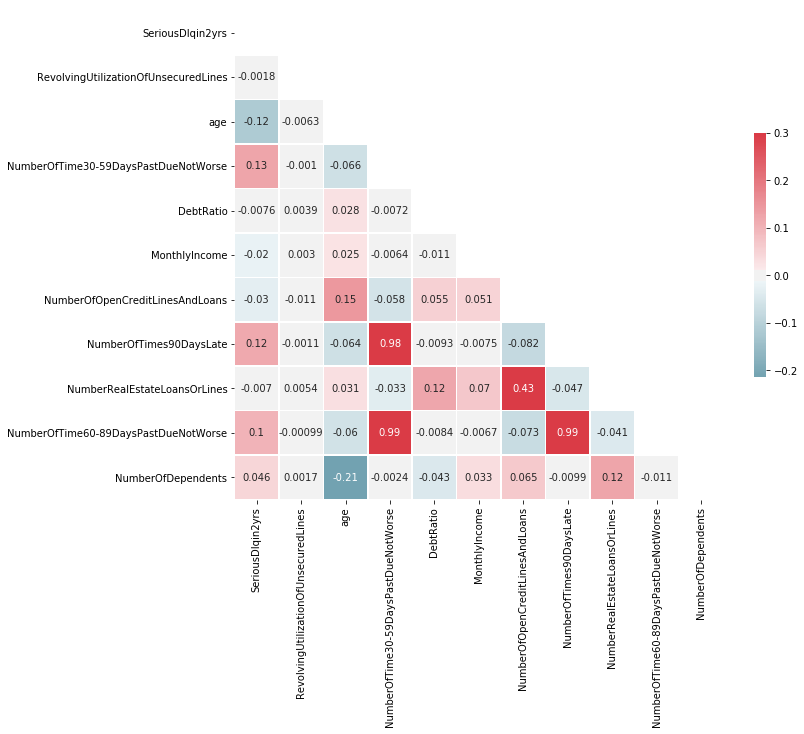

In [8]:
# do oglądania korelacji najlepiej użyć wizualizacji w postaci heatmapy:
corr = data.corr()

# Wygenerowanie maski dla górnego trójkąta
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Ustawienie figury wykresu (rozmiarów)
f, ax = plt.subplots(figsize=(11, 9))

# Wygenerowanie niestandardowej rozbieżnej mapy kolorów
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Jak widzimy największą korelację względem metryki, którą chcemy przewidzieć (czyli **SeriousDlqin2yrs**), mają odpowiednio:<br>
- NumberOfTime30-59DaysPastDueNotWorse: 0.13
- NumberOfTimes90DaysLate: 0.12
- NumberOfTime60-89DaysPastDueNotWorse: 0.1      
- NumberOfDependents: 0.046 <br>

Dodatkowo wiek ma dość wysoką ujemną korelację:
- age: -0.12

Przyjrzyjmy się lepiej tym cechom

### Zmienne powiązane z ilością dni

C:\Users\Wojtek\Anaconda3\envs\alleml\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


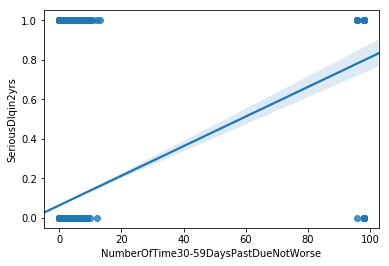

In [9]:
sns.regplot(x='NumberOfTime30-59DaysPastDueNotWorse', y= 'SeriousDlqin2yrs', data=data)

Widzimy, ciekawą zależność, że liczba dni opóźnienia ze spłatą w granicach 30-59 dni faktycznie ma duży dodatni wpływ na to czy dana osoba zadłóży się w ciągu dwóch lat. Przyjżyjmy się lepiej rozkładowi tej zmiennej.

In [10]:
data['NumberOfTime30-59DaysPastDueNotWorse'].value_counts(sort=False)

0     211208
1      26870
2       7766
3       2955
4       1257
5        547
6        228
7         96
8         53
9         22
10        11
11         2
12         3
13         1
19         1
96         6
98       477
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

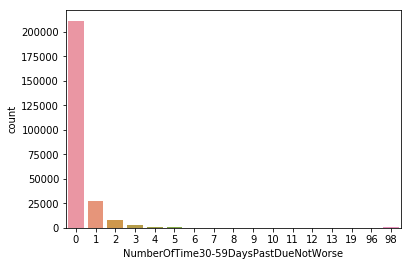

In [11]:
sns.countplot(data['NumberOfTime30-59DaysPastDueNotWorse']) 

Hipoteza: Podobną zależność zauważymy dla reszty cech z dodatnią korelacją, w których występuje liczba dni.<br>
A teraz ją sprawdźmy:

In [12]:
data['NumberOfTimes90DaysLate'].value_counts(sort=False)

0     237447
1       8837
2       2617
3       1112
4        482
5        233
6        124
7         64
8         40
9         33
10        10
11         6
12         3
13         4
14         2
15         2
16         1
17         2
18         1
96         6
98       477
Name: NumberOfTimes90DaysLate, dtype: int64

In [13]:
data['NumberOfTime60-89DaysPastDueNotWorse'].value_counts(sort=False)

0     238771
1       9594
2       1849
3        534
4        166
5         59
6         23
7         16
8          3
9          4
11         1
96         6
98       477
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64

Jak widzimy, rozkład danych jest identyczny dla prawie każdej z tych zmiennych. A więc zapewne ich korelacja też będzie wysoka. Sprawdźmy to!

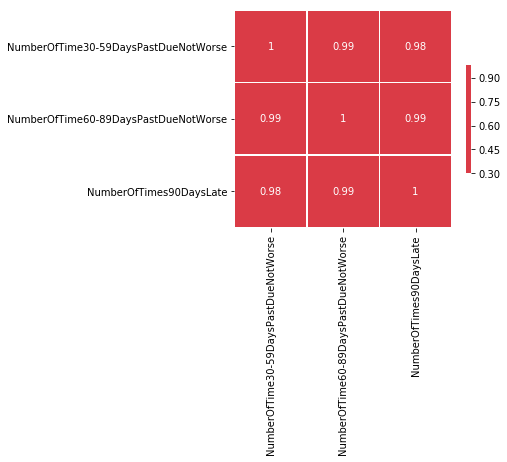

In [14]:
corr_days_map = data[['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTimes90DaysLate']].corr()

f, ax = plt.subplots(figsize=(5, 4))

sns.heatmap(corr_days_map, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Jak widać ich korelacja wynosi praktycznie 100%, a więc tylko jednej z tych zmiennych możemy użyć do stworzenia modelu. Stwórzmy sobie więc kolumnę w której zagregujemy te dane.

In [15]:
data['DaysLate_90+'] = (data['NumberOfTimes90DaysLate']>0).astype(int)
data.groupby('DaysLate_90+')['SeriousDlqin2yrs'].describe()

,count,mean,std,min,25%,50%,75%,max
DaysLate_90+,,,,,,,,
0,141662.0,0.046265,0.210059,0.0,0.0,0.0,0.0,1.0
1,8338.0,0.416407,0.492992,0.0,0.0,0.0,1.0,1.0


### Wiek - jako zmienna kategoryczna

Ciekawsze wykresy możemy wygenerować dla wieku, który akurat ma ujemną korelację (czyli jeśli wiek rośnie to zmienna SeriousDlqin2yrs maleje). Możemy np. zwizualizować jego zależność względem zmiennej dla której stworzymy model.

In [16]:
mask = data['SeriousDlqin2yrs'].notnull()
bins = [0, 30, 40, 50, 60, 70, 110]
labels = ['0-29', '30-39', '40-49', '50-59', '60-69', '70+']
data['age_grouped'] = pd.cut(data['age'], bins, right=0, labels=labels)
groups = data[mask].groupby('age_grouped')['SeriousDlqin2yrs']
pd.concat([groups.count(), groups.mean()], axis=1)

,SeriousDlqin2yrs,SeriousDlqin2yrs
age_grouped,,
0-29,8821,0.117334
30-39,23183,0.100720
40-49,34377,0.083719
50-59,35301,0.064531
60-69,28905,0.036326
70+,19413,0.023180


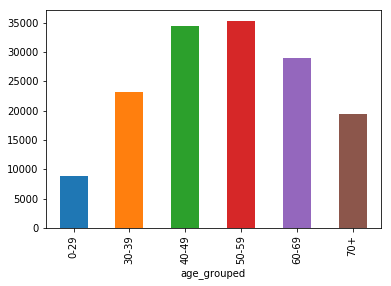

In [17]:
groups.count().plot.bar()

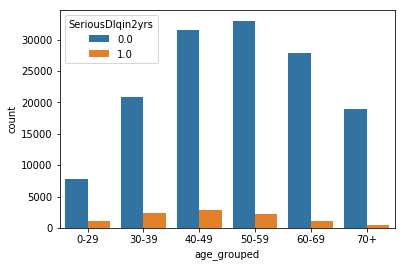

In [18]:
sns.countplot(x = "age_grouped", hue = "SeriousDlqin2yrs", data = data)

### Wstępna normalizacja

Przy prostej analzie danych za pomocą wykresów możemy dojść do wniosku, że wiek lepiej się spisuje jako zmienna kategoryczna, a wcześniej dodaną kolumnę z jego zakresem możemy łatwo wykorzystać przy tworzeniu modelu regresyjnego. Tym samym dokonaliśmy wstępnej normalizacji danych dla wieku. Kolejnym ciekawym wnioskiem jaki możemy wyciągnąć jest to, że wiek w stosunku do zmiennej dyskretnej dla której chcemy stworzyć model ma rozkład normalny.

In [19]:
#data = data.drop('age_grouped', axis=1) 

### Ciekawostka: Pandas Profiling

To statystyczny "kombajn", który przeanalizuje dużo czynników za nas :) Nie jest może super dokładny, ale niekiedy może być pomocny we wstępnej analizie :)  Potwierdził też część wcześniej wyciągniętych wniosków np. odnośnie zaległych dni ze spłatą.

In [20]:
import pandas_profiling
pandas_profiling.ProfileReport(data)

Number of variables,13
Number of observations,251503
Total Missing (%),4.8%
Total size in memory,22.3 MiB
Average record size in memory,93.0 B
Numeric,9
Categorical,1
Boolean,1
Date,0
Text (Unique),0
Rejected,2


## Tworzenie modelu i podział danych

In [65]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix

### Wydzielenie danych 

In [137]:
# Usuwanie z datasetu niepotrzebnych danych (lub danych niepewnych)
clean_data = data.drop(['RevolvingUtilizationOfUnsecuredLines',
              'age',
              'DebtRatio',
              'MonthlyIncome',
              'NumberOfDependents',
              'NumberOfOpenCreditLinesAndLoans', 
              'NumberRealEstateLoansOrLines',
              'NumberOfTime30-59DaysPastDueNotWorse',
              'NumberOfTime60-89DaysPastDueNotWorse',
              'NumberOfTimes90DaysLate'
              ], axis=1)
clean_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251503 entries, 0 to 251502
Data columns (total 3 columns):
SeriousDlqin2yrs    150000 non-null float64
DaysLate_90+        251503 non-null int32
age_grouped         251503 non-null category
dtypes: category(1), float64(1), int32(1)
memory usage: 3.1 MB


In [30]:
cleaned_dataset = pd.get_dummies(clean_data, drop_first=True)
cleaned_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251503 entries, 0 to 251502
Data columns (total 7 columns):
SeriousDlqin2yrs     150000 non-null float64
DaysLate_90+         251503 non-null int32
age_grouped_30-39    251503 non-null uint8
age_grouped_40-49    251503 non-null uint8
age_grouped_50-59    251503 non-null uint8
age_grouped_60-69    251503 non-null uint8
age_grouped_70+      251503 non-null uint8
dtypes: float64(1), int32(1), uint8(5)
memory usage: 4.1 MB


In [34]:
X0 = cleaned_dataset[data['SeriousDlqin2yrs']==0].drop('SeriousDlqin2yrs', axis=1)
X1 = cleaned_dataset[data['SeriousDlqin2yrs']==1].drop('SeriousDlqin2yrs', axis=1)
y0 = cleaned_dataset[data['SeriousDlqin2yrs']==0]['SeriousDlqin2yrs']
y1 = cleaned_dataset[data['SeriousDlqin2yrs']==1]['SeriousDlqin2yrs']

In [38]:
print(X0.shape, X1.shape, y0.shape, y1.shape)

(139974, 6) (10026, 6) (139974,) (10026,)


In [37]:
X0.describe().T

,count,mean,std,min,25%,50%,75%,max
DaysLate_90+,139974.0,0.034764,0.183181,0.0,0.0,0.0,0.0,1.0
age_grouped_30-39,139974.0,0.148942,0.356033,0.0,0.0,0.0,0.0,1.0
age_grouped_40-49,139974.0,0.225035,0.417607,0.0,0.0,0.0,0.0,1.0
age_grouped_50-59,139974.0,0.235922,0.424575,0.0,0.0,0.0,0.0,1.0
age_grouped_60-69,139974.0,0.199001,0.399250,0.0,0.0,0.0,0.0,1.0
age_grouped_70+,139974.0,0.135475,0.342232,0.0,0.0,0.0,0.0,1.0


In [43]:
y1.describe()

count    10026.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: SeriousDlqin2yrs, dtype: float64

In [49]:
X  = pd.concat([X0, X1])
y  = pd.concat([y0, y1])
print(X.shape, y.shape)

(150000, 6) (150000,)


In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=42)

### Model Regresji Liniowej

In [128]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math

In [129]:
model = LinearRegression().fit(X_train, y_train)

In [134]:
print('Score: %.6f' % model.score(X_test, y_test))
print('AUC score: %.6f' %  roc_auc_score(y_test, model.predict(X_test)))
print('train RMSE = ',math.sqrt(mean_squared_error(model.predict(X_train),y_train)))
print('test RMSE = ',math.sqrt(mean_squared_error(model.predict(X_test),y_test)))
#print('baseline RMSE = ', baseline_RMSE)

Score: 0.119987
AUC score: 0.734948
train RMSE =  0.23387694671106893
test RMSE =  0.23452145401784563


Jak widzimy regresja liniowa poradziła sobie tutaj nad wyraz słabo, pomimo całkiem nie najgorszego progu AUC, score=0.11 jest szczególnie niski (kom: nie do końca jestem pewien, czy nie jest to wynik zbyt niski (wyjaśnienie w nastepnym wniosku) warto się nad tym jeszcze zastanowić).

### Model Regresji Logistycznej

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [94]:
classifier = LogisticRegression(solver='lbfgs').fit(X_train, y_train)
y_predicted = classifier.predict(X_test)

In [135]:
accuracy = accuracy_score(y_test, y_predicted)
no_correct = accuracy_score(y_test, y_predicted, normalize=False)
no_of_test_samples = len(y_test)

print('Score: %.6f' % classifier.score(X_test, y_test))
print("accuracy: {}".format(accuracy))
print("no of correctly classified samples: {}".format(no_correct))
print("no of test samples: {}".format(no_of_test_samples))

Score: 0.931867
accuracy: 0.9318666666666666
no of correctly classified samples: 34945
no of test samples: 37500


Wynik 93% jest nad wyraz wysoki, prawdopodbnie popełnione zostały błędy (model jest zoverfittowany), z drugiej strony próbujemy wyznaczyć zmienną binarną co dla naszego dość niewielkiego zbioru danych jest "łatwe do zgadnięcia". Np. w grze arkanoid, poruszając pojazdem prawo lewo lub po prostu losowo, my (czy nawet maszyna) też jest w stanie zdobyć całkiem wysoki wynik (Źródło wniosków: https://www.youtube.com/watch?v=XDMNm7PQpxk).